/home/kasinadhsarma/urbandevlopment/backend/ml/newpredection/dataset.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Mean Absolute Error: 123.90254684537683
Model saved to traffic_prediction_model.pkl
Predicted Traffic Flow: 273.91041666666666


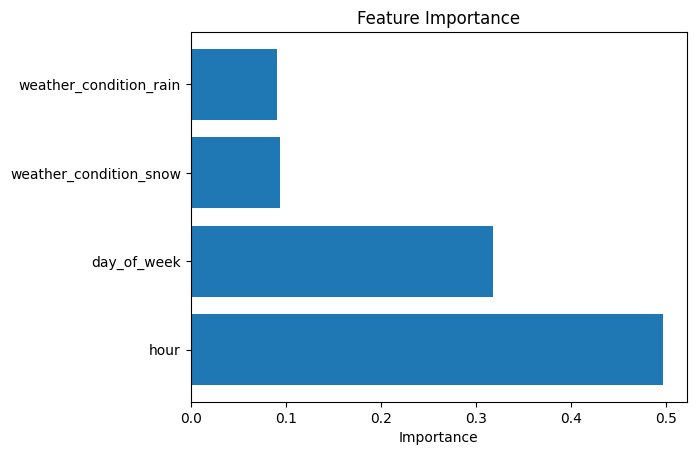

In [21]:
# main.ipynb
import pandas as pd
import matplotlib.pyplot as plt
from dataset import load_data, preprocess_data, split_data
from train import train_model, evaluate_model, save_model
from prediction import load_model, predict_traffic

# Load and preprocess data
file_path = 'traffic_data.csv'
data = load_data(file_path)
data = preprocess_data(data)

# Split data
X_train, X_test, y_train, y_test = split_data(data, target_column='traffic_flow')

# Train the model
model = train_model(X_train, y_train)

# Evaluate the model
mae = evaluate_model(model, X_test, y_test)

# Save the model
save_model(model, 'traffic_prediction_model.pkl')

# Load the model for prediction
loaded_model = load_model('traffic_prediction_model.pkl')

# Example prediction
example_data = pd.DataFrame({
    'hour': [8],
    'day_of_week': [1],
    'weather_condition_rain': [0],
    'weather_condition_snow': [0]
})

predicted_traffic = predict_traffic(loaded_model, example_data)
print(f"Predicted Traffic Flow: {predicted_traffic}")

# Visualize feature importance
importances = model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()